# Final Project(Gapminder Dataset)-Applied Data Science(Spring 2019)

## Prajakta Patil

## INFO-I590-9772 Applied Data Science

# Questions
1. Are all countries represented well with this data or does it have more data for one region versus other regions of world?
2. Is average life expectancy and population growth over years related to each other? Do they follow a same trend?
3. Is per capita income growing at similar rates for all regions or are there certain regions that have sudden increase?
4. Is there relation between any variables that can be used to predict one variable when other is known?
5. If there is relation between any 2 variables, can we statistically prove the relation?
6. For related variables, does it look like data in normally distributed or is there any bias?
7. Can the data be learned to identify different clusters representing unique data sub-sets? Can we identify number of clusters using K-means method?

In [1]:
# Importing Python packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LinearRegression 
import requests
from bs4 import BeautifulSoup
from bubbly.bubbly import bubbleplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #do not miss this line
from plotly import tools

# Data Description and cleaning
In order to understand given data, we first need to import data in Python. I imported essential packages. Then, I imported data in csv format as provided. This allowed to inspect data size, number of variables etc. 
As shown below Gapminder data has total 41284 rows and 6 columns. These 6 columns are our variables from this data. The column names in data are 'Country' for names of countries, 'Year' for years for which given data is recorded, 'life' to show average life expectancy of people in given country for given year, 'population' recording population of gievn country in that year, 'income' to show average per capita income of country for year, 'region' to represent geographic location of country i.e. Africa, Asia etc. 'Country', 'population' and 'region' are variable type 'object' i.e. they are either numeric or character. 'Year' is recorded as type 'int64' i.e. it is integer/whole number and lastly 'life' and 'income' are 'float64' meaning they are recorded in float/decimal number format. 

In [2]:
# Loading dataset 
data = pd.read_csv('gapminder.csv')

In [3]:
# Information of data
data.shape

(41284, 6)

In [4]:
data.columns

Index(['Country', 'Year', 'life', 'population', 'income', 'region'], dtype='object')

In [5]:
data.dtypes

Country        object
Year            int64
life          float64
population     object
income        float64
region         object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 6 columns):
Country       41284 non-null object
Year          41284 non-null int64
life          41284 non-null float64
population    15467 non-null object
income        38943 non-null float64
region        41284 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
data.isnull().sum()

Country           0
Year              0
life              0
population    25817
income         2341
region            0
dtype: int64

In [9]:
data['region'].value_counts()

Sub-Saharan Africa            10562
Europe & Central Asia         10468
America                        7961
East Asia & Pacific            6256
Middle East & North Africa     4309
South Asia                     1728
Name: region, dtype: int64

In [10]:
Country=data.groupby('Country')
len(Country)

197

In [11]:
data.describe()

,Year,life,income
count,41284.000000,41284.000000,38943.000000
mean,1907.462504,42.884766,4570.795214
std,62.241440,16.220812,10096.543747
min,1800.000000,1.000000,142.000000
25%,1854.000000,31.000000,883.000000
50%,1908.000000,35.118539,1450.000000
75%,1962.000000,55.600000,3483.000000
max,2015.000000,84.100000,182668.000000


Pulling info summary for whole data showed, 'population' and 'income' columns did not have 41284 entries. Looking for null showed number of values missing is exactly equal to gap between number of values for those 2 columns and data length. Before looking for range of variables, I cleaned the data to make sure these missing values or variations in data format do not affect output. For that, I first removed ',' to have all numbers in same format. Then, as there were large number of rows for population without any entries to them, I modified those rows. I copied data from a given year to years below that until there was next recorded population entry. Basically, there was entry for population at beginning of each decade and no entries for next 9 years until first year of next decade. I copied value from first year down for all remaining 9 years in each such case. For all this, I created new colmn 'new_population' and removed original column for population. After that I observed these were 2341 rows in income column out of total 41284 rows that were null. I removed all rows with no income record as it was small compared to length of data. 

In [12]:
# data cleaning - forward fill method and creating new column for population
data['new_population']=data['population'].ffill(axis = 0) 

In [13]:
data['new_population'] = data['new_population'].str.replace(',','').astype(int)
pd.set_option('float_format', '{:f}'.format)

In [14]:
del data['population']

In [15]:
#removing rows with missing values 
clean_data = data.dropna(axis=0)

In [16]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38943 entries, 0 to 41273
Data columns (total 6 columns):
Country           38943 non-null object
Year              38943 non-null int64
life              38943 non-null float64
income            38943 non-null float64
region            38943 non-null object
new_population    38943 non-null int32
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 1.9+ MB


Once above pre-processing steps were done, I looked at summary of all variables. 'Year' has data from year 1800 to 2015. 'life' had range from 1 year to 84.1 years. I believe lower end of numbers might be wrong data entries. 'income' had range from 142 to 182668. I think these numbers are in dollars. 'new_population' which is basically the population of countries, had range of 2128 to 1.37 billions. There were total 183 countries in this data for which all variables are recorded. These countries are categorized in 6 regions in dataset. The data had 197 countries before data was cleaned for missing values.

In [17]:
clean_data.describe()

,Year,life,income,new_population
count,38943.000000,38943.000000,38943.000000,38943.000000
mean,1907.706777,42.939173,4570.795214,13286559.611021
std,62.354709,16.145343,10096.543747,64111379.736550
min,1800.000000,1.000000,142.000000,2128.000000
25%,1854.000000,31.100000,883.000000,357145.000000
50%,1908.000000,35.400000,1450.000000,1823651.000000
75%,1962.000000,55.577150,3483.000000,6060248.500000
max,2015.000000,84.100000,182668.000000,1376048943.000000


In [18]:
Country=clean_data.groupby('Country')
len(Country)

183

In [19]:
no_of_region=clean_data.groupby('region')
len(no_of_region)

6

# Data Exploration
## Exploratory plots

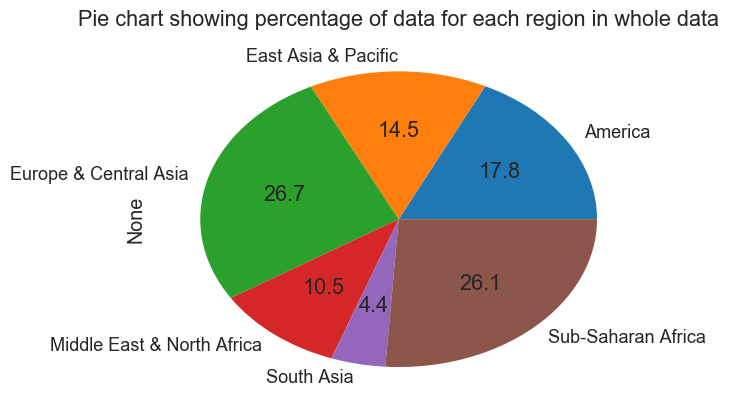

In [68]:
# Pie chart for region to show percentage of data for each region in whole data 
region=clean_data.groupby('region')
region.size().plot(kind='pie',autopct='%.1f', title= 'Pie chart showing percentage of data for each region in whole data')

As the data is for a certain time period, I wanted to understand trend of important variables over it. I first checked for how does the data represent 183 countries. Pie chart below shows that data has fewer countries from South Asia and Middle East & North Africa. Majority of data is for European, Central Asian, Sub-Saharan African countries.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDE312A748>,
      dtype=object)

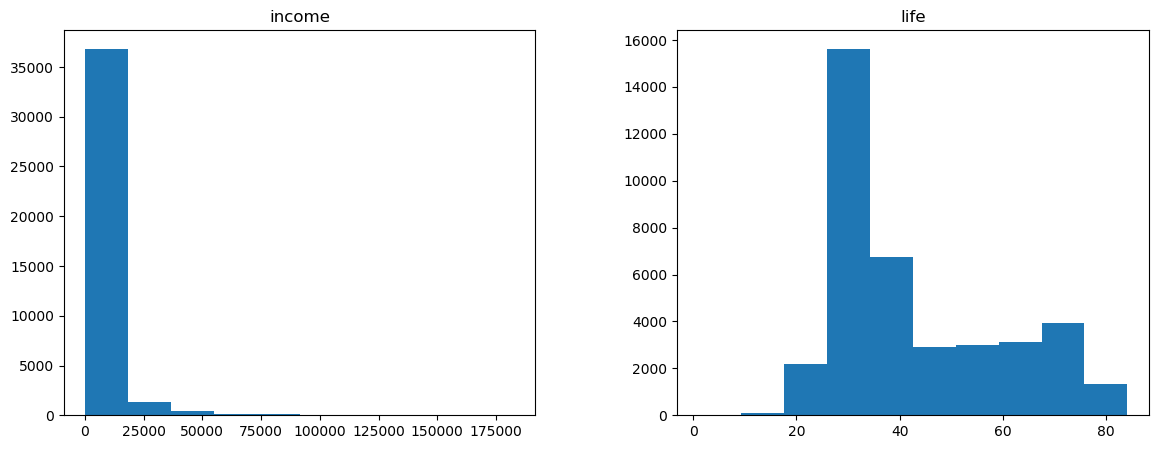

In [70]:
#Histogram of Per capita income and Life Expectancy
plt.style.use('default')
clean_data[['income','life']].hist(figsize=(14,5),grid=False)

I looked at simple histograms for per capita income and life expectancy for whole data just to get idea about how the distribution looks. Income follows power law distribution. Life expectancy has peak in 30s, meaning lot of countries had overall life expectancy of 30.

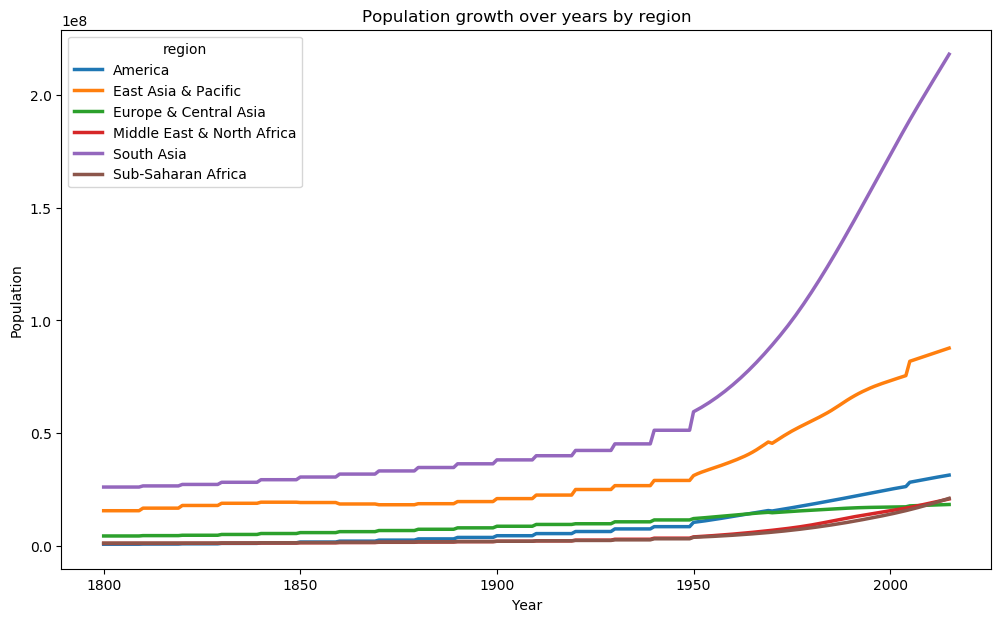

In [27]:
#line chart of Population growth over years by region
explore = clean_data.groupby(['Year','region']).new_population.mean().unstack()
explore.plot(figsize=(12,7), title='Population growth over years by region', linewidth=2.5)
plt.ylabel('Population');

Next, I plotted variables population, life expectancy and per capita income over years by region. This showed few really important trends. Population growth exploded after 1950s. Specially so for South Asian countries. This follows generally the period after their independence from British rule. European and Central Asian countries were big exception with flat population growth after 1950s.

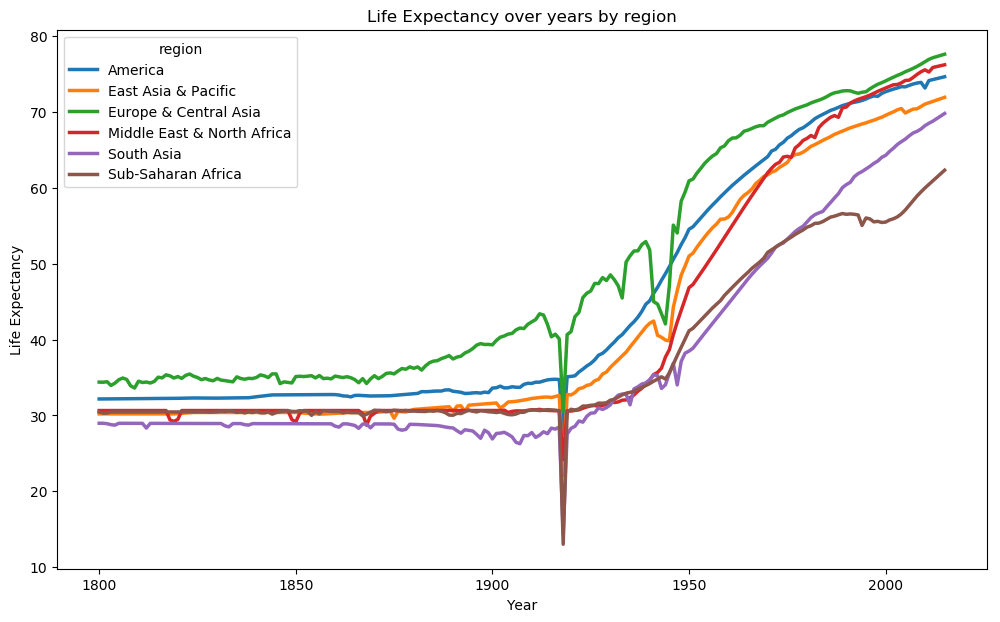

In [25]:
# line chart for Life Expectancy over years by region
explore = clean_data.groupby(['Year','region']).life.mean().unstack()
explore.plot(figsize=(12,7), title='Life Expectancy over years by region', linewidth=2.5)
plt.ylabel('Life Expectancy');

Next, I looked at trend of life expectancy over years. This shows how life expectancy has increased steadily since 1930s for all regions. There are 2 big drops for all regions in this parameter which are exactly results of World War I and World War II. South Asian countries were the exception as these wars were fought far away from the region.

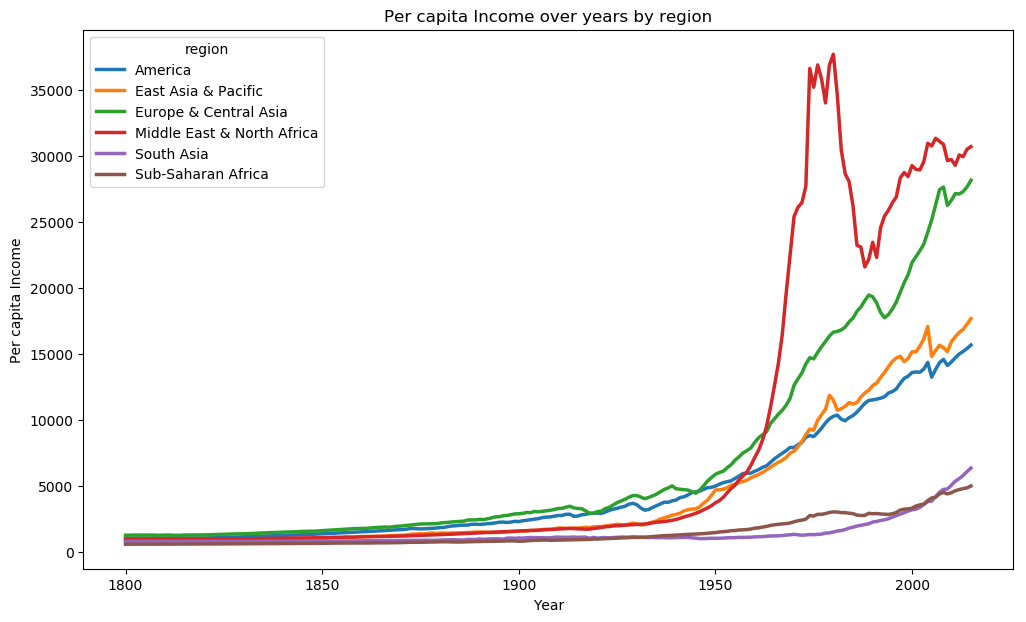

In [26]:
# line chart of Per capita Income over years by region
explore = clean_data.groupby(['Year','region']).income.mean().unstack()
explore.plot(figsize=(12,7), title='Per capita Income over years by region', linewidth=2.5)
plt.ylabel('Per capita Income');

Lastly, I looked at per capita income over years. Here also there was growth for all regions after 1950s. The oil boom during 1960-1970s resulted in sudden increase in per capita income for Middle Eastern and North African countries. 

Simply looking at trend of variables does not give full picture of how data is distributed. So, I created box plots for life expectancy, population and per capita income.   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0.5,1,'Population distribution by Region')

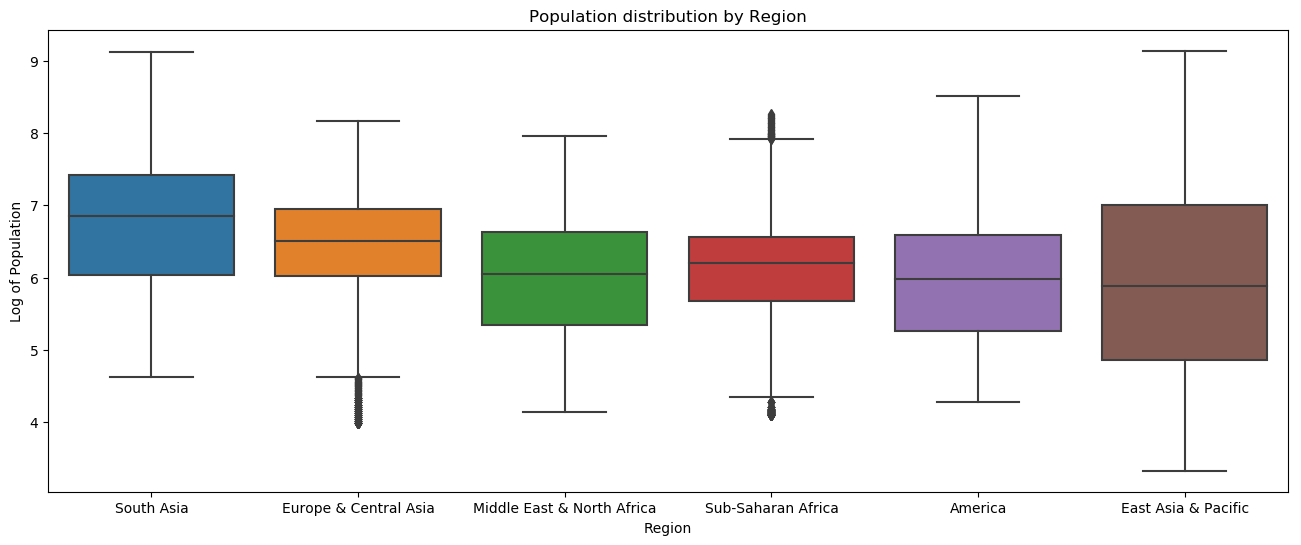

In [30]:
clean_data['log_pop'] = np.log10(clean_data['new_population'])
clean_data['log_income'] = np.log10(clean_data['income'])
plt.figure(figsize=(16, 6))
sns.boxplot(x="region", y="log_pop", data=clean_data)
plt.xlabel ('Region')
plt.ylabel ('Log of Population')
plt.title ('Population distribution by Region')

For population, I took log values as there was big range in the values. Box plot shows that this variable is quiet normally distributed with some outliers for European and Sub-Saharan countries. South Asian countries had maximum population. East Asian and Pacific countries had maximum range.

Text(0.5,1,'Life Expectancy distribution by Region')

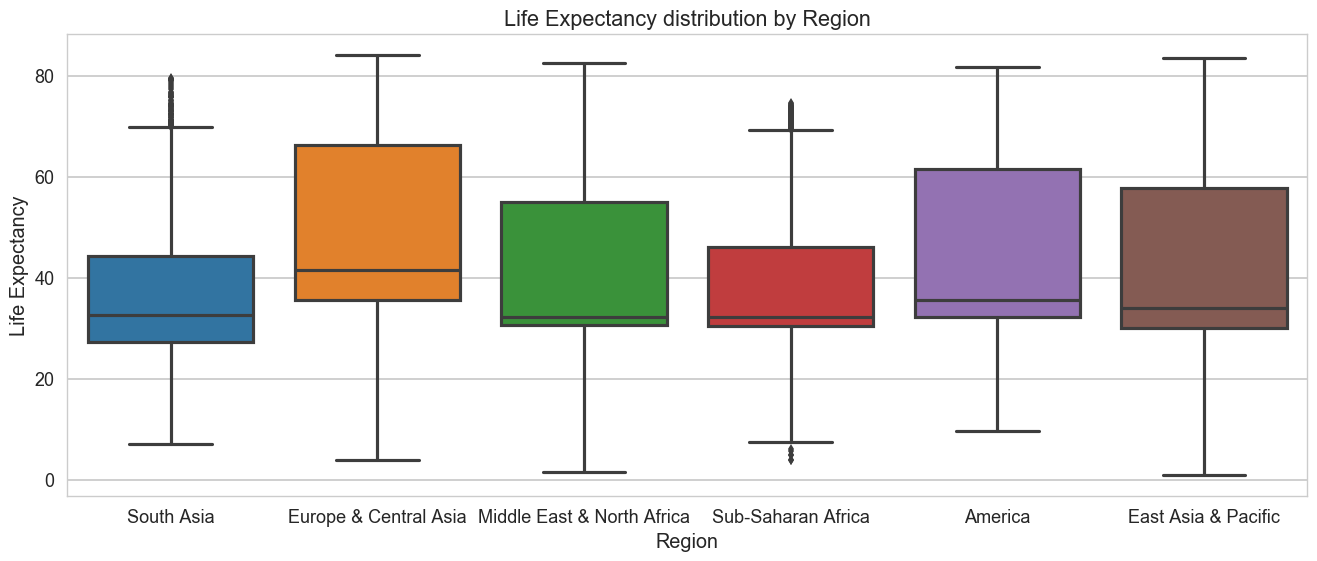

In [69]:
#box plot 
plt.figure(figsize=(16, 6))
sns.boxplot(x="region", y="life", data=clean_data)
plt.xlabel ('Region')
plt.ylabel ('Life Expectancy')
plt.title ('Life Expectancy distribution by Region')

Looking at box plot of life expectancy, we can see this is not normally distributed for all regions. All regions have right skewed distribution. There were outliers for South Asia and Sub-Saharan countries. East Asian and Pacific countries have maximum range for this variable as well.

Text(0.5,1,'Income distribution by Region')

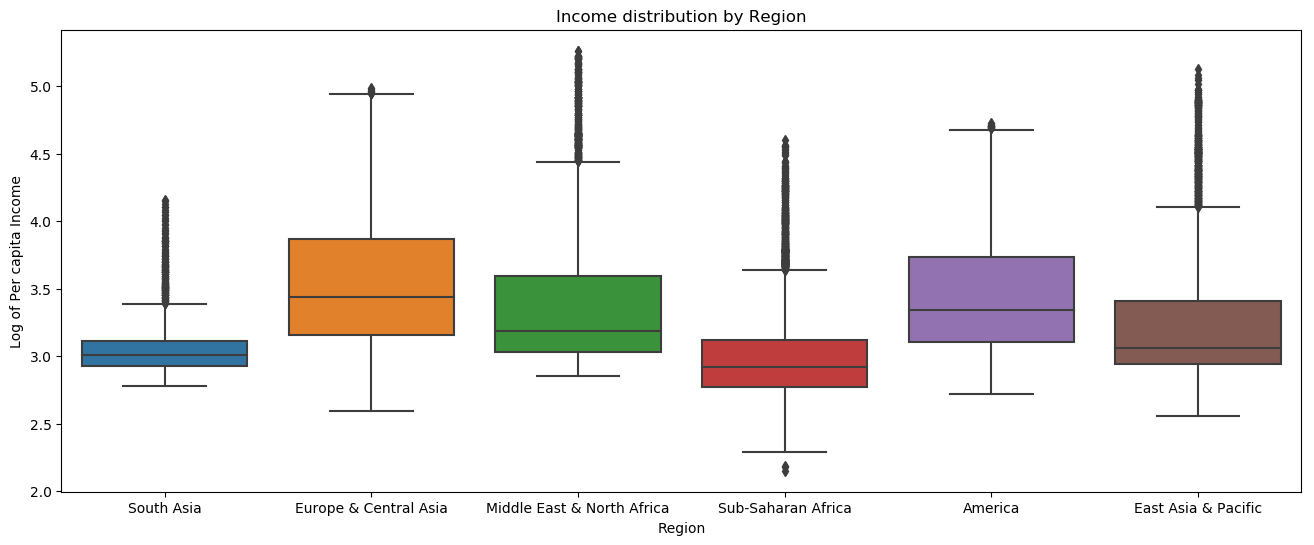

In [31]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="region", y="log_income", data=clean_data)
plt.xlabel ('Region')
plt.ylabel ('Log of Per capita Income')
plt.title ('Income distribution by Region')

Lastly, distribution of log of per capita income is also skewed but, not as much as population. However, most importantly there are many outliers for almost all regions. American and European countries do not have as many outliers, meaning all countries and the population has well distributed earnings. 

After looking at basic parameters of data, I wanted to see if any of these variables seem to have any relation to each other or not.  

In [32]:

clean_data.corr()

,Year,life,income,new_population,log_pop,log_income
Year,1.000000,0.783979,0.413550,0.129140,0.338976,0.645435
life,0.783979,1.000000,0.576409,0.118505,0.319104,0.818356
income,0.413550,0.576409,1.000000,0.034314,0.135126,0.744542
new_population,0.129140,0.118505,0.034314,1.000000,0.406182,0.072666
log_pop,0.338976,0.319104,0.135126,0.406182,1.000000,0.291934
log_income,0.645435,0.818356,0.744542,0.072666,0.291934,1.000000


Text(0.5,1,'Heatmap for correlations between variables')

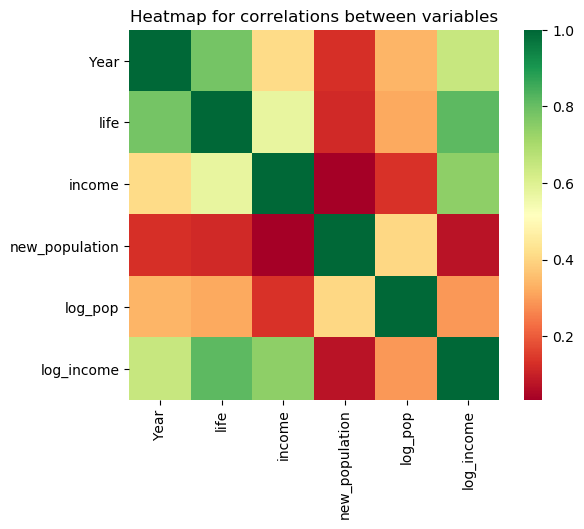

In [33]:
# corr heatmap
sns.heatmap(clean_data.corr(), square=True, cmap='RdYlGn')
plt.title ('Heatmap for correlations between variables')

I first created heatmap of variables. As seen below, I added log of population and income to see if that helps with finding relation between any other variable. This showed there is fair amount of correlation between life expectancy and log of income.

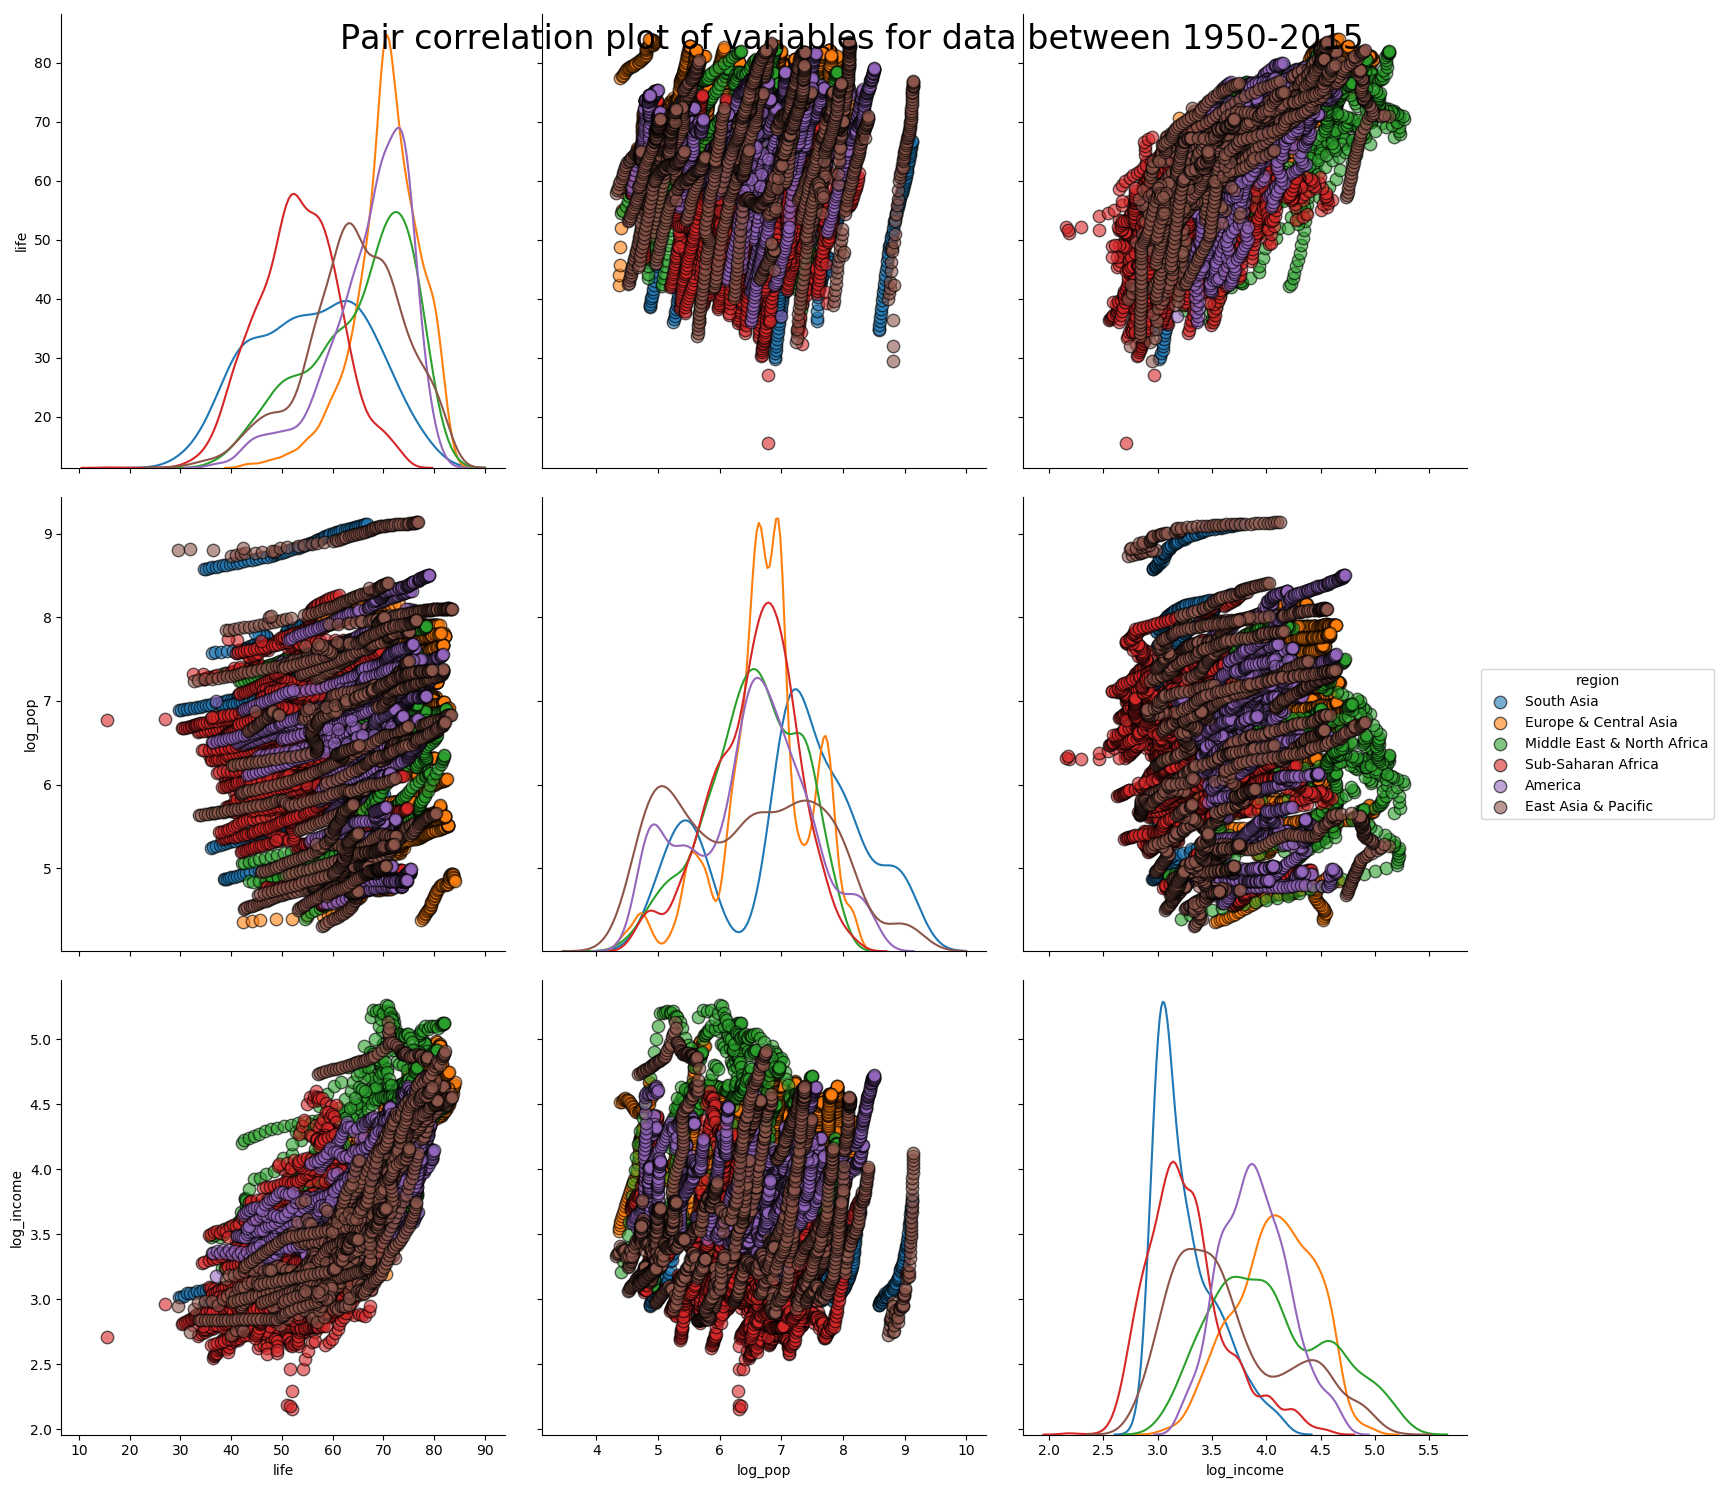

In [34]:
#Pair correlation plot of variables for data between 1950-2015
sns.pairplot(clean_data[clean_data['Year'] >= 1950], 
             vars = ['life', 'log_pop', 'log_income'], 
             hue = 'region', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 5);
# Title 
plt.suptitle('Pair correlation plot of variables for data between 1950-2015', size = 24);

I wanted to study this even more. For this, I created pair plots of life expectancy, log of population and per capita income. I originally plotted this for whole range of years from 1800-2015. However, as there was no clear relation between any of the pairs, I tried data from 1950-2015. This shows hints of some relation between life expectancy and per capita income with exception of South Asian countries. I believe this is probably due to relatively few countries from South Asia in this data and failr wide ranges of life expectancy and per capita income for them.

# Regression analysis
After doing basic data exploration as discussed above, it suggested there is possibly some relation between life expectancy and lof of per capita income. We formulate null hypothesis that there is no relation between life expectancy and log of per capita income. If we find strong evidence against this, null hypothesis will be rejected and we can say that life expectancy and log of per capita income are indeed related. I performed regression analysis to understand if we can statistically find any such correlation. 

In [35]:
lr = LinearRegression()
from scipy.stats import linregress
import numpy as np
log_income=clean_data["log_income"]
life= clean_data["life"]
Year=clean_data["Year"]
linregress(life,log_income)

LinregressResult(slope=0.02448004323052702, intercept=2.2424483604363488, rvalue=0.8183561134086765, pvalue=0.0, stderr=8.711965817885666e-05)

I performed simple linear regression to see relation between life expectancy and log of per capita income. We see r value of 0.8183 which means there is good correlation and given life expectancy, log of per capita income can be predicted with decent accuracy. Also, p value of 0.0 means we reject null hypothesis of no relation between these variables. The standard error in my opinion is still little big considering we are looking at log of per capita income.

In [36]:
Year =Year.values.reshape(-1, 1)
life=life.values.reshape(-1, 1)
log_income=log_income.values.reshape(-1,1)

Text(0,0.5,'log_income')

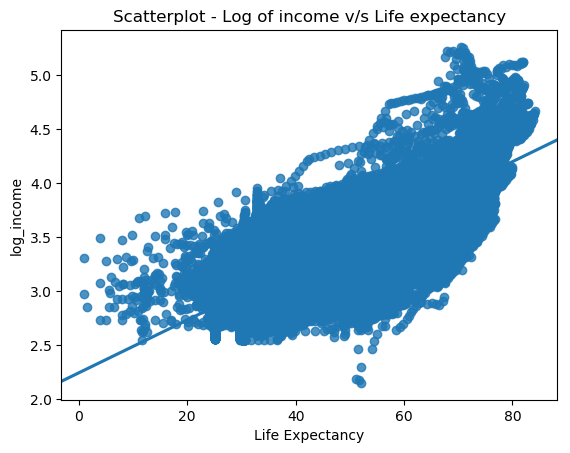

In [37]:
scat1 = sns.regplot(x="life",y="log_income", fit_reg=True, data=clean_data)
plt.title('Scatterplot - Log of income v/s Life expectancy')
plt.xlabel('Life Expectancy')

plt.ylabel('log_income')


Scatter plot of Life Expectancy versus Log of per capita income shows a fairly decent correlation and one can visually get feel for this relation. As life expectancy increases log of per capita income also increases.

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# regression
lm = smf.ols(formula = 'life ~ log_income', data = clean_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 7.896e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:13:24   Log-Likelihood:            -1.4201e+05
No. Observations:               38943   AIC:                         2.840e+05
Df Residuals:                   38941   BIC:                         2.840e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.1647      0.324   -145.529      0.0

In order to confirm if indeed the results of linear regression are to be believed, I performed OLS regression to check R squared distances and residuals for these variables. My model gave me R squared value of 0.67 which again shows decent relation between life expectancy and log of per capita income. Value of 0.67 means the model can explain 67% of variation in log of per capita income with change in life expectancy. Also, standard error is very low and tells us that the model has performed well.

In order to know if the residuals are normally distributed I performed diagnosis using standard methods as discussed below.

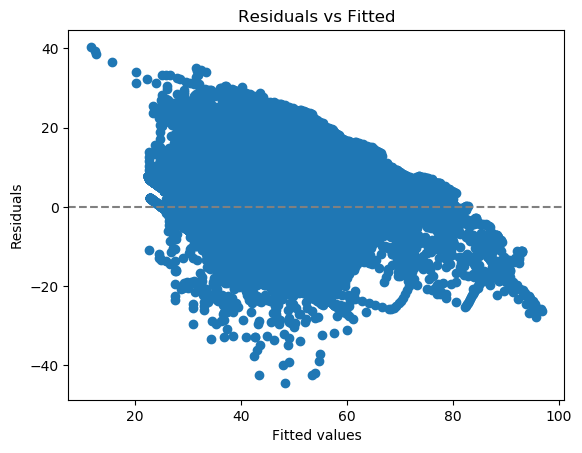

In [72]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({'country': clean_data.Country,
                        'resids': lm.resid,
                        'std_resids': lm.resid_pearson,
                        'fitted': lm.predict()})

## raw residuals vs. fitted
residsvfitted = plt.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)



The plot for residuals vs fitted values shows they are pretty randomly distributed around zero. There are some values on both right and left hand side suggesting some outliers. 

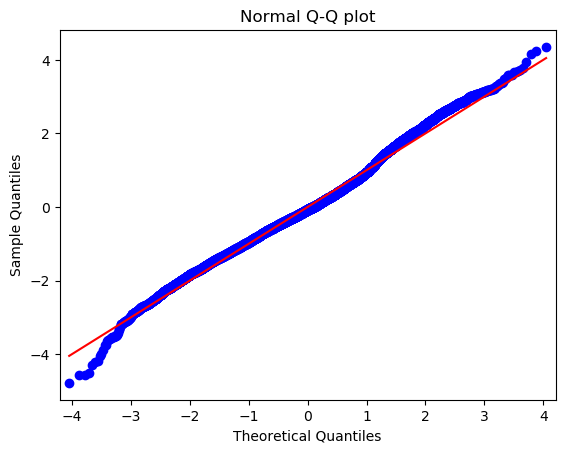

In [73]:
## q-q plot
qqplot = sm.qqplot(results['std_resids'], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Q-Q plot')
plt.show(qqplot)

In order to understand if the data is drawn from normal distribution, I created Normal Q-Q plot to chech distribution of residuals. It shows they are pretty well normally distributed with very small data that deviates from normal on both ends. 

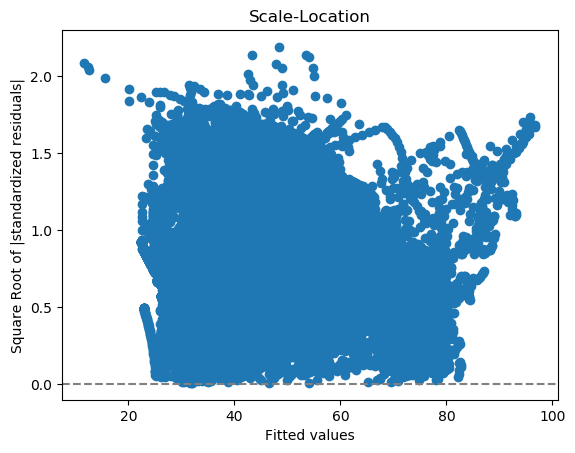

In [75]:
## scale-location
scalelocplot = plt.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
plt.xlabel('Fitted values')
plt.ylabel('Square Root of |standardized residuals|')
plt.title('Scale-Location')
plt.show(scalelocplot)


Checking for homoscedasticity of residuals or to simply tell if residuals are equally spread along predictor range, I created Scale-location plot. The plot shows homoscedasticity in general. There is possibly some heteroscedasticity in the middle of data. 

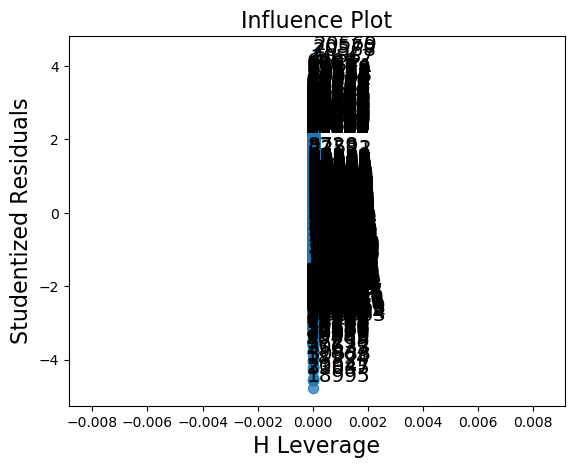

In [76]:
## residuals vs. leverage
residsvlevplot = sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2)
plt.show(residsvlevplot)

I performed a quick check for any influential outliers in data. I wasn't expecting any based on earlier plots and that is what the influence plot shows.

In [41]:
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
sns.set_style('whitegrid')
sns.set_context('talk')
pd.options.mode.chained_assignment = None 


# Cluster Analysis
It is interesting to see if data can be divided into clusters based on variables. As we have observed that life expectancy and log of per capita income are 2 variabels that seem to have some relation, I wanted to see if they can be used to identify clusters of regions. 

In [42]:
clean_data['region'].value_counts()

Europe & Central Asia         10383
Sub-Saharan Africa            10152
America                        6936
East Asia & Pacific            5640
Middle East & North Africa     4104
South Asia                     1728
Name: region, dtype: int64

Once again, we can see our number of enrtries/data points for each region.
I first assigned numerical values to represent each region as 0 to 5. Then I assigned life expectancy and log of per capita income as features to create cluster for target variable 'region'. Then, in order to train data; I randomly assigned 70% data as training data and kept 30% as test data out of total data.

In [43]:
#Created new column to assign numeric value to represent regions
clean_data['region_number'] = ''
clean_data['region_number'][clean_data.region == 'Europe & Central Asia'] = 0
clean_data['region_number'][clean_data.region == 'Sub-Saharan Africa'] = 1
clean_data['region_number'][clean_data.region == 'America'] = 2
clean_data['region_number'][clean_data.region == 'East Asia & Pacific'] = 3
clean_data['region_number'][clean_data.region == 'Middle East & North Africa'] = 4
clean_data['region_number'][clean_data.region == 'South Asia'] = 5

In [44]:
ft= clean_data[['life','log_income']]
tar = clean_data[['region_number']]
ft = np.array(ft)
tar = np.array(tar).astype('int32')

In [45]:
train, test, train_t, test_t  = train_test_split(ft, tar, test_size=.3)
print('Size of training data')
print(train.shape)

Size of training data
(27260, 2)


In [46]:
clusters=range(1,9)
meandist=[]
 
for k in clusters:
    model=KMeans(n_clusters=k, algorithm = 'auto')
    model.fit(train)
    cluster_assignment=model.predict(train)
    meandist.append(sum(np.min(cdist(train, model.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

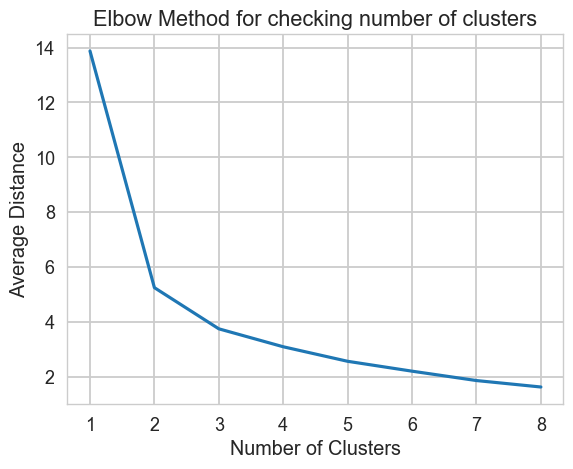

<Figure size 640x480 with 0 Axes>

In [59]:
# elbow visualization
k = 2
 
fig = plt.figure()
plt.plot(clusters, meandist)
plt.plot(clusters[(k-1)], meandist[(k-1)])
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Elbow Method for checking number of clusters')
plt.savefig('Elbow Method.png', bbox_inches='tight')
plt.show()



plt.tight_layout()

I used range of 1 to 9 to get idea of how slope of line changes for 6 regions. As seen above, most significant change in slope or elbow effect is for 2 clusters followed by another change at 3.

In [66]:
model=KMeans(n_clusters=2, algorithm = 'auto')
model.fit(train)
target = model.predict(test)
print(target)

[0 0 1 ... 1 0 1]


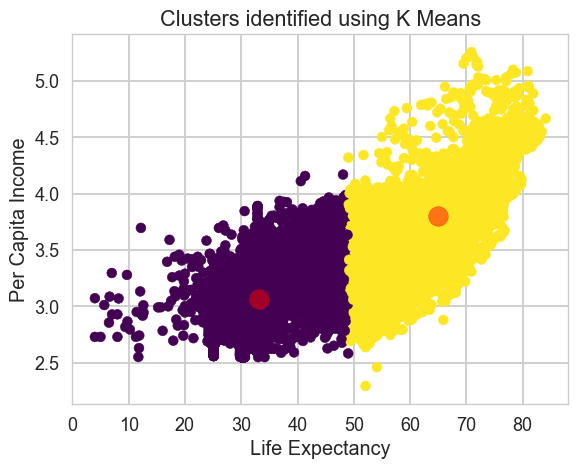

In [67]:
plt.scatter(test[:, 0], test[:, 1], c=target, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title ('Clusters identified using K Means')
plt.xlabel ('Life Expectancy')
plt.ylabel ('Per Capita Income')
plt.savefig('K Means.png', bbox_inches='tight')

In [63]:
model=KMeans(n_clusters=6, algorithm = 'auto')
model.fit(train)
target = model.predict(test)
print(target)

[4 0 1 ... 1 4 1]


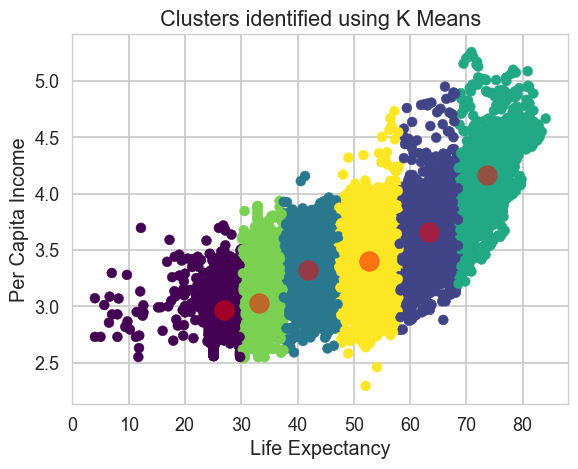

In [64]:
plt.scatter(test[:, 0], test[:, 1], c=target, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title ('Clusters identified using K Means')
plt.xlabel ('Life Expectancy')
plt.ylabel ('Per Capita Income')
plt.savefig('K Means.png', bbox_inches='tight')

However, as we have 6 regions in dataset; I created cluster plot for 2 and 6 number of clusters. We can see that data can be clustered to identify 6 regions based on life expectancy and log of per capita income beyond just 2 clusters that elbow method suggested.

# Findings

1. Data has various variables showing information for 6 regions of world. European, Central Asian, Sub-Saharan and American countries have more data/rows for them. South Asian and Middle Eastern countries have less data for them. This has some effect later on while trying to look for relation between different variables.
2. Non surprisingly life expectancy and population has increased steadily for all regions around world. This is significant for 1950 onwards. There are 2 big drops that align with World War I and II. We can also see that South Asian countries do not have this drop as they were not as involved as Europe in these wars. European countries are an expection for population growth as their population remained steady since 1950s compared to all other regions.
3. Per capita income has grown around the world since 1950. Middle Eastern countries however had a sudden growth in 1960s-70s due to oil boom. All regions around world however have lot of outliers with countries that have much higher per capita income than other countries in region with exception of European and American countries.
4. It is difficult to identify relation between variables as provided. However, once population and per capita income are converted to log values, it helps find some correlations. Specially, there is relation between life expectancy and log of per capita income. This means knowing life expectancy, we can predict per capita income of those regions or vice a versa. This shows how having good income results in increased quality of life and hence increase in life expectancy.
5. Linear regression shows a good correlation between life expectancy and log of per capita income and is validated by OLS regression. R quared value is 0.67 and standard error is very small which means model has performed very well.
6. Residual vs fitted plot, Normal Q-Q plot, Scale Location plot and Influence plot all show that data is drawn from normally distributed data and that there are no significant outliers that influence results.
7. Elbow suggested 2 clusters are most ideal while trying to cluster regions using life expectancy and log of income. However, as there are 6 regions in data; they can also be identified by using these 2 variables. K-means clustering was able to do this job satisfactorily.
8. Data wrangling was really important as there were almost 75% rows for variable population that had no data. Without using forward fill method for those rows, it would have been very difficult to find relations between variables and also identify clusters clearly. 

# References:
1. https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn
2. https://pandas.pydata.org/pandas-docs/version/0.17.0/visualization.html
3. https://matplotlib.org/users/legend_guide.html
4. https://data.library.virginia.edu/diagnostic-plots/